# Assignment no.2 - TheoreticalML - LinearRegression

#### David george monir : 20201059
#### Maher mohsen bahig: 20200415
#### Section S5

## Linear Regression :
        Linear regression analysis is used to predict the value of a variable based on the value of another variable.
        The variable you want to predict is called the dependent variable. The variable you are using to predict the other 
        variable's value is called the independent variable.

### Ref : IBM

$$ Y=W*X+B $$

### Least Square Method :

    The method of least squares is a standard approach in regression analysis to approximate the solution of overdetermined 
    systems (sets of equations in which there are more equations than unknowns) by minimizing the sum of the squares of the 
    residuals (a residual being the difference between an observed value and the fitted value provided by a model)
    made in the results of each individual equation.

### Ref : Wiki

$$ W=((X^T)*X))^{-1} *X^T * Y $$

### Gradient descent :
    In mathematics, gradient descent (also often called steepest descent) is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The idea is to take repeated steps in the opposite direction 
    of the gradient (or approximate gradient) of the function at the current point,
    because this is the direction of steepest descent. Conversely, 
    stepping in the direction of the gradient will lead to a local maximum of that function;
    the procedure is then known as gradient ascent.

### Ref : Wiki

#  Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \  \; & \text{for j = 0..n-1}\newline
  \newline \rbrace
\end{align*}$$


### - Importing used libraries

In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import numpy as np
from numpy.linalg import inv
import copy, math
import sklearn
import pandas as pd 
import seaborn as sns
import plotly_express as px
import random
from sklearn.model_selection import train_test_split

## - Main Assi (Least Square Method)

## -Generate random dataset

In [2]:
# x1 = np.random.randint(1000,size=(1000,1))
# x2 = np.random.randint(1000,size=(1000,1))
# x3 = np.random.randint(1000,size=(1000,1))

# y = np.random.rand(1000)

# for i in range(1000) :
#     y[i] = ( (5*x1[i]) +  (3*x2[i])  + (1.5*x3[i]) ) + 6 
# #     ====== > 9.5(x[i])


# with open('x1.csv','a') as csvfile:
#  np.savetxt(csvfile, x1,delimiter=',',header='X',fmt='%s', comments='')
# with open('x2.csv','a') as csvfile:
#  np.savetxt(csvfile, x2,delimiter=',',header='X',fmt='%s', comments='')
# with open('x3.csv','a') as csvfile:
#  np.savetxt(csvfile, x3,delimiter=',',header='X',fmt='%s', comments='')

# with open('y.csv','a') as csvfile:
#  np.savetxt(csvfile, y,delimiter=',',header='Y',fmt='%s', comments='')

# # first , we generate 1000 random x's
# # then create array y of 1000 element
# # calculate the y's using given equation 
# # write x's to csv
# # write y's to csv
# # add the 1's column to feature file
# # merge features , outputs csv into one csv file  


In [3]:
df=pd.read_csv('generated dataset.csv')

In [4]:
df.head()


x1   x2   x3  b       y
0  855  400  140  1  5691.0
1  883  776  869  1  8052.5
2  909  190  194  1  5412.0
3  233  303  322  1  2563.0
4   55  445  513  1  2385.5

<Figure size 576x576 with 0 Axes>

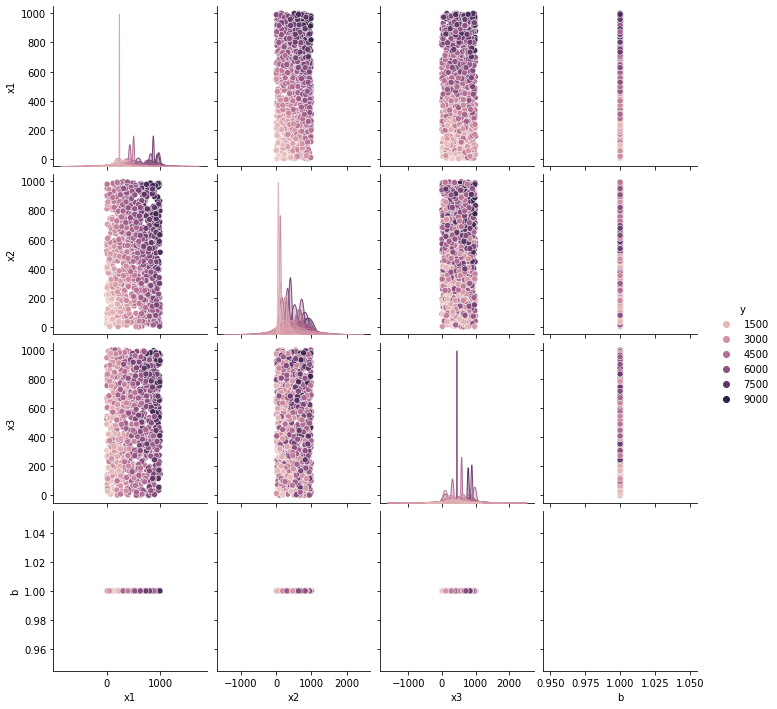

In [5]:
sns.color_palette("dark:#5A9_r", as_cmap=True)
plt.figure(figsize=(8, 8))
ax = sns.pairplot(df,hue='y')
plt.show()

In [6]:
px.scatter_3d(df, x="x1", y="x2", z="x3", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"},color='y' )

## Train , Test splitting 

In [5]:
test_x, train_x, test_y, train_y = train_test_split(df[['x1','x2','x3','b']], df['y'], test_size = 0.3 , random_state = 42)
test_x  = test_x.to_numpy()
test_y  = test_y.to_numpy()
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()

## Implement Least Squares Method 
$$ W=((X^T)*X))^{-1} *X^T * Y $$

In [6]:
"""
name : least_square

parameters : 
    Matrix of features X ( multiple vectors/rows )
    vector of outputs  y ( column )

process :
    calculate the weights vector using least square method based on above rule 
    
return :
    vector of weights W

"""

def least_square(X,y):
    
    # get the matirx X transpose 
    x_transpose = np.transpose(X.copy())
    
    # multiply X matrix to it's transpose 
    x_transpose_dot_x = np.matmul(x_transpose.copy(),X.copy())
    
    # calculate the ( l.h.s term ) inverse of the multiplied matrices
    inv_term = np.linalg.inv(x_transpose_dot_x.copy())
    
    # calculate the ( r.h.s term ) 
    y_term = np.dot(x_transpose.copy(),y.copy())
    
    # multiply l.h.s * r.h.s resulted matrices  
    return np.matmul(inv_term,y_term)


## Final weights  & accuracy 

In [9]:
Weights = least_square(train_x,train_y)

# weights   
w1 = Weights[0]
w2 = Weights[1]
w3 = Weights[2]

# y-intercept
b  = Weights[3]


## Evaulate regression loss (Accuracy)

#### Predict one instance

In [7]:
"""
name : predict_instance

parameters : 
    vector of features X ( row ) ( single vector of features )
    vector of weights  W ( row )

process :
    calculate the output of a single instance of X matrix ( a single row / entery )  
    
return :
    output (predicted) y 

"""

def predict_instance(X,W):
    
    # intialize the output value 
    prediction = 0 
    
    # move on this vector of features to calculate the weighted features values  
    for j in range(len(W)-1):
        prediction += W[j] * X[j]
    
    # add the b variable ( y-intercept value ) to perdiction 
    prediction += W[len(W)-1]
    
    return prediction

#### Predict all data

In [8]:
"""
name : predict

parameters : 
    Matrix of features X ( multiple vectors/rows )
    vector of weights  W ( row )

process :
    calculate the vector of outputs y 
    
return :
    vector of outputs y 

"""

def predict(X,W):
    
    # create vector of outputs ( column )
    y = np.array(len(X),1)
    
    # move on each vector of features (row) in X [ move on each X instance ] 
    for i in range(len(X)):
        
        # calculate for single row ( features vector ) ( instance )
        predict_instance( X[i] , W )
        
    return y 

### Calculate mean absolute error (MAE) : Loss & accuracy

In [9]:
"""
name : calculate_loss

parameters : 
    Matrix of features X
    vector of values   y ( column )
    vector of weights  W

process :
    calculate the loss of our linear regression model
    1/m * sum( abs( pred - actual ) ) for all testing instances  
    
return :
    loss value

"""

def calculate_loss(X,y,W):
    
    # dataset size ( columns )
    m = len(X)
    
    # average factor 
    average = 1/m
    
    # summation variable 
    sum_of_squared_diffrences = 0
    
    # sum 
    for i in range(m):
        
        # get perdiction for single instance ( data set row of features )
        predicted_val = predict_instance( X[i] , W ) 
        
        # add it's absolute diffrence with the actual values  
        sum_of_squared_diffrences += abs( y[i] - predicted_val )
        
        
    # calculating loss using loss rule 
    loss = average * sum_of_squared_diffrences
    
    return loss

In [10]:
def calculate_accuracy(X,y,W):
    return 1 - calculate_loss(X,y,W)

In [11]:
calculate_accuracy(test_x,test_y,Weights)


NameError: name 'Weights' is not defined

## - Bonus Assi (Gradient descent)

In [12]:
df2=pd.read_csv("USA_Housing.csv")

In [13]:
df2.head()


Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  b  
0                          4.09      23086.80050  1.059034e+06  1  
1                          3.09      40173.07217  1.505891e+06  1  
2                          5.13      36882.15940  1.058988e+06  1  
3                          3.26      34310.24283  1.260617e+06  1  
4                          4.23      26354.10947  6.309435e+05  1

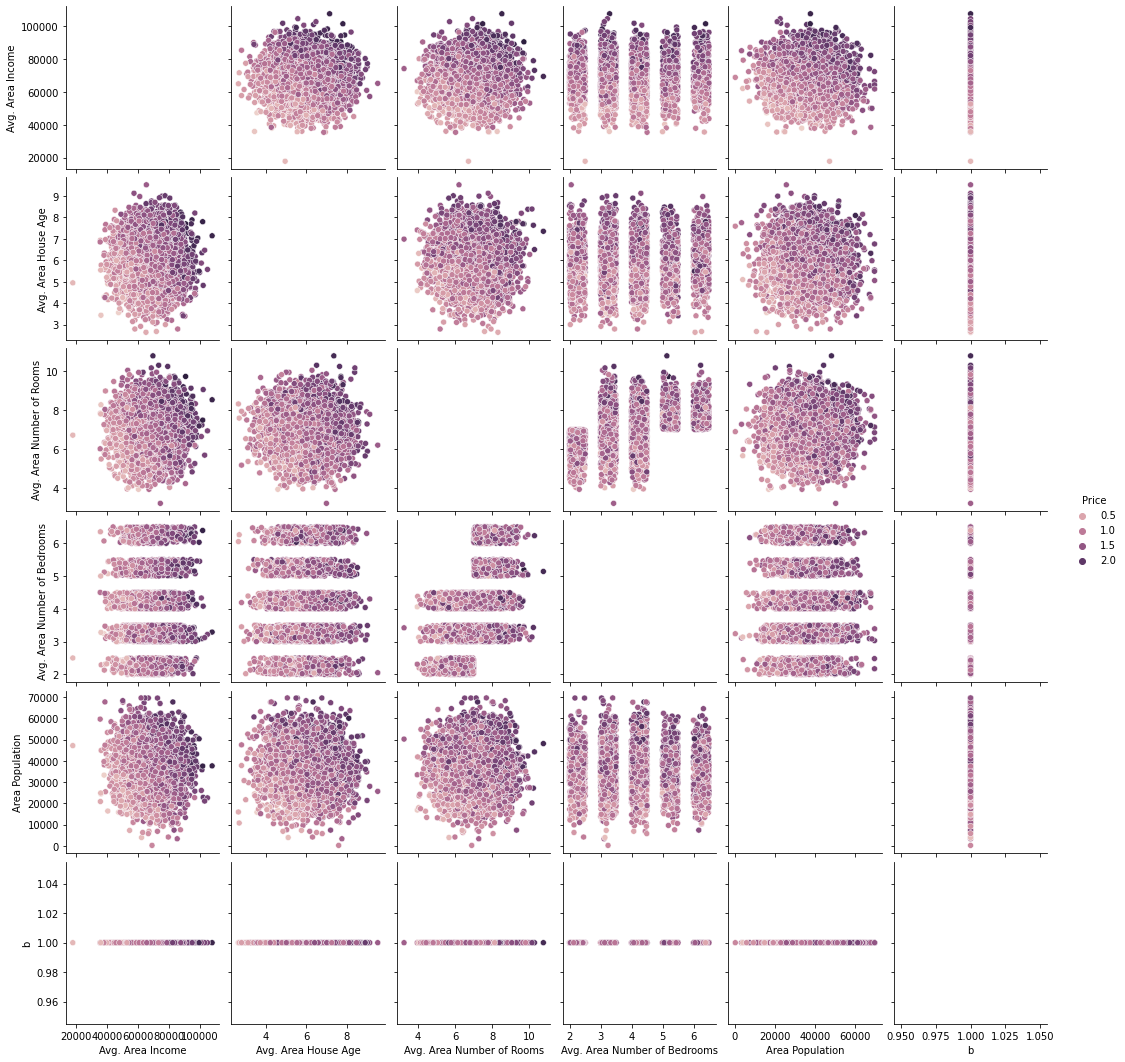

In [17]:
sns.pairplot(df2,hue='Price')

In [18]:
px.scatter_3d(df2, x="Avg. Area Number of Rooms", y="Avg. Area House Age", z="Area Population", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"},color='Price' )

In [14]:
housing_test_x, housing_train_x, housing_test_y, housing_train_y = train_test_split(df2[['Avg. Area Number of Rooms','Avg. Area House Age','Area Population','b']], df2['Price'], test_size = 0.3 , random_state = 42)
housing_test_x  = housing_test_x.to_numpy()
housing_test_y  = housing_test_y.to_numpy()
housing_train_x = housing_train_x.to_numpy()
housing_train_y = housing_train_y.to_numpy()

$$ X^{T} * (XW-Y) $$

In [20]:
initial_w= np.random.rand(4)
initial_w

array([0.26654589, 0.79835509, 0.80202967, 0.60386421])

In [21]:
def Loss(X,y,w):
    loss=0
    for i in range(len(X)):
        loss+=(1/len(X))*((X[i]*w).sum()-y[i])**2
        
    return loss

In [134]:
# def gradient_descent(X,y,w,alpha,num_iterations):
#     for i in range(num_iterations):
#         slopes=np.zeros(4)
#         for j in range(len(X)):
#             for k in range(len(w)):
#                 slopes[k]+=(1/len(X))*(((X[j]*w).sum()-y[j])*X[j][k])
#         w=w-(alpha*slopes)
# #         print(Loss(X,y,initial_w))
#     return w
                

In [135]:
# def gradient_descent(X,y,w,alpha,itera):
#     m= len(X)
#     for i in range(itera):
#         x_transpose = np.transpose(X.copy())
#         left=np.matmul((x_transpose.copy()),(np.matmul(X.copy(),w.copy())))
#         right=np.matmul(x_transpose.copy(),y.copy())
#         dervi=(1/m)*(left-right)
#         w=w+(alpha*dervi)
#         print(w)
#     return w
    


In [39]:
def gradient_descent(X,y,w,alpha,itera):
    m= len(X)
    for i in range(itera):
        x_transpose = np.transpose(X.copy())
        x_transpose.dot((X.dot(w))-(y))
        print(X.dot(w)-y)
    return w
    


In [ ]:
a=gradient_descent(train_x,train_y,initial_w,0.1,1000)

[ 7099.91409309  3105.44695393  3623.04127634  7341.12337665
  3346.96944118  2821.29146001  8465.37551376  2695.91099429
  5322.35464038  6584.7111018   7878.52209367  4611.84414148
  1005.28587612  6352.51105855  2008.60707963  4799.6508851
  1346.28208886  2877.76230176  3615.98790336 -1234.9543838
  3070.26000072  3684.29342383  9677.52533547  4269.35822704
  2905.37156403  3989.1480858   2304.36753788   706.98563423
  2172.70688433  3984.31451942  5491.85376874  4990.81115156
  7319.90086677  3722.77108949  6640.99284733  4622.43474242
  3987.64232526  1726.36910099  1582.11264981  5623.44519647
  8725.4943602   5603.75335103  8025.03941896  2728.59631673
  8409.53686374  2608.60248648  1531.4026463   7471.50168403
  2153.69128697  4406.57556166  3790.93172061  5318.09142148
   541.25956895  3224.77511278  4755.92009879  9127.69309929
  6117.14876857  2424.26670421  1947.10251723  4133.95916353
  5408.58626067  6111.81082834 11033.82101282  7277.41156897
  8691.22232151  7247.1665

[ 7099.91409309  3105.44695393  3623.04127634  7341.12337665
  3346.96944118  2821.29146001  8465.37551376  2695.91099429
  5322.35464038  6584.7111018   7878.52209367  4611.84414148
  1005.28587612  6352.51105855  2008.60707963  4799.6508851
  1346.28208886  2877.76230176  3615.98790336 -1234.9543838
  3070.26000072  3684.29342383  9677.52533547  4269.35822704
  2905.37156403  3989.1480858   2304.36753788   706.98563423
  2172.70688433  3984.31451942  5491.85376874  4990.81115156
  7319.90086677  3722.77108949  6640.99284733  4622.43474242
  3987.64232526  1726.36910099  1582.11264981  5623.44519647
  8725.4943602   5603.75335103  8025.03941896  2728.59631673
  8409.53686374  2608.60248648  1531.4026463   7471.50168403
  2153.69128697  4406.57556166  3790.93172061  5318.09142148
   541.25956895  3224.77511278  4755.92009879  9127.69309929
  6117.14876857  2424.26670421  1947.10251723  4133.95916353
  5408.58626067  6111.81082834 11033.82101282  7277.41156897
  8691.22232151  7247.1665

In [33]:
a*=10

In [34]:
int(calculate_loss(test_x,test_y,a))

4751

In [26]:
Weights = least_square(housing_train_x,housing_train_y)

NameError: name 'least_square' is not defined

In [10]:
Weights

array([ 1.15763037e+05,  1.60720469e+05,  1.50788261e+01, -1.08116030e+06])

In [ ]:
def Loss(X,y,w):
    sum=0;
    for i in range(len(X)):
        predicted=np.dot(w,X[i])
        sum+=(predicted-y[i])**2
        
    return sum/(2*len(X))

In [ ]:
Loss(test_x,test_y,Weights)